In [16]:
# Se importan las librerías necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
import plotly.graph_objs as go
import plotly.express as px
from tabulate import tabulate

# Librerías para el KMeans
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

# Librerías para las métricas de evaluación del modelo
from sklearn.metrics import (
    silhouette_score,
    calinski_harabasz_score,
    davies_bouldin_score,
)

# Librería para ignorar la advertencia de Windows
import warnings

warnings.filterwarnings("ignore")

In [2]:
# Cargamos el dataset
datos = pd.read_csv("Mall_Customers.csv")

# 1. Análisis exploratorio de los datos

In [3]:
print(datos.head(10))
print(datos.describe())

   CodigoCliente  Genero  Edad  IngresosAnuales  PuntajeGasto
0              1    Male    19               15            39
1              2    Male    21               15            81
2              3  Female    20               16             6
3              4  Female    23               16            77
4              5  Female    31               17            40
5              6  Female    22               17            76
6              7  Female    35               18             6
7              8  Female    23               18            94
8              9    Male    64               19             3
9             10  Female    30               19            72
       CodigoCliente        Edad  IngresosAnuales  PuntajeGasto
count     200.000000  200.000000       200.000000    200.000000
mean      100.500000   38.850000        60.560000     50.200000
std        57.879185   13.969007        26.264721     25.823522
min         1.000000   18.000000        15.000000      1.00000

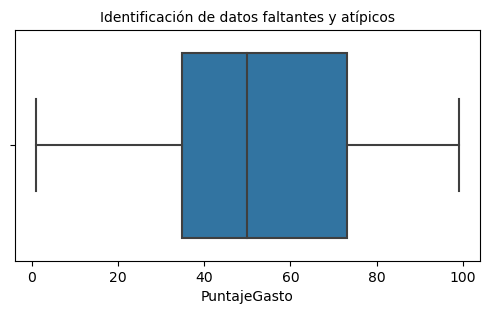

In [4]:
# Identificación de los datos faltantes
plt.figure(figsize=(6, 3))
sns.boxplot(x=datos["PuntajeGasto"])
plt.title("Identificación de datos faltantes y atípicos", fontsize=10)
plt.show()

# 2. Preprocesamiento de los datos

In [5]:
# Imputar los valores faltantes. Numéricos -> Moda | Cadenas -> Más frecuente
imputadorNumerico = SimpleImputer(strategy="most_frequent")

columnasNumericas = datos.select_dtypes(include=["float64", "int64"]).columns
datos[columnasNumericas] = imputadorNumerico.fit_transform(datos[columnasNumericas])

imputadorCategorico = SimpleImputer(strategy="most_frequent")

columnasCategoricas = datos.select_dtypes(include=["object"]).columns
datos[columnasCategoricas] = imputadorCategorico.fit_transform(
    datos[columnasCategoricas]
)

# 3. Selección de las caracteríticas relevantes para entrenar el modelo

In [6]:
# Para el entrenamiento del modelo se seleccionan las características de:
# 1. Edad
# 2. PuntajeGasto
datos = datos[["Edad", "PuntajeGasto"]]

In [7]:

# Realizamos una visualización de los datos
datos.head(10)

,Edad,PuntajeGasto
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40
5,22,76
6,35,6
7,23,94
8,64,3
9,30,72


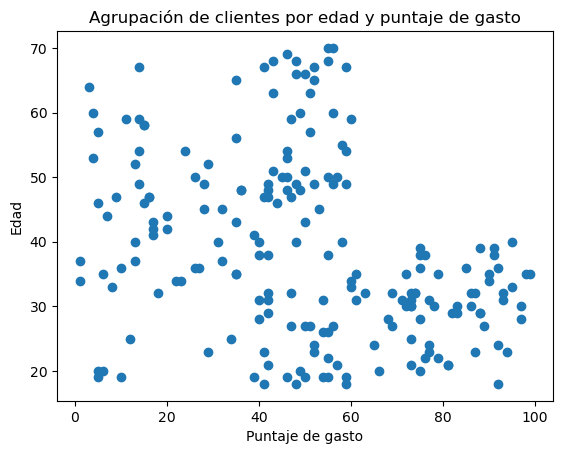

In [8]:
# Con base a esta definición se genera una gráfica previa al agrupamiento.
plt.scatter(datos["PuntajeGasto"], datos["Edad"])
plt.xlabel("Puntaje de gasto")
plt.ylabel("Edad")
plt.title("Agrupación de clientes por edad y puntaje de gasto")
plt.show()

# 4. Entrenamiento  del modelo configurando los hiperparametros

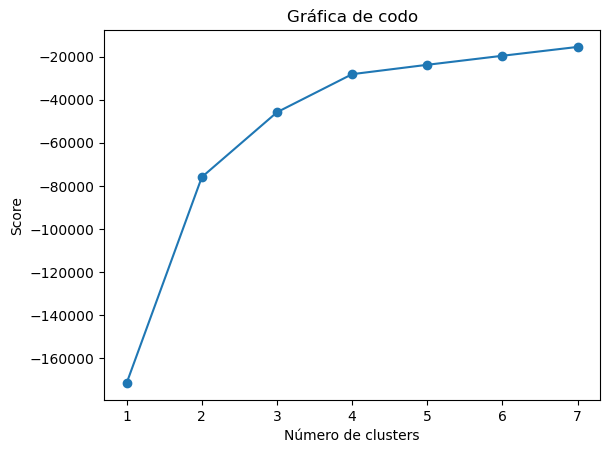

In [9]:
# Realizamos la gráfica de codo para identificar el valor de k, para la creación de los grupos.
rango = range(1, 8)
kmeans = [KMeans(n_clusters=i) for i in rango]
kmeans
score = [kmeans[i].fit(datos).score(datos) for i in range(len(kmeans))]
score
plt.plot(rango, score, marker="o")
plt.xlabel("Número de clusters")
plt.ylabel("Score")
plt.title("Gráfica de codo")
plt.show()

In [10]:
# En base la gráfica generada podemos concluir que 5 es la mejor cantidad de clusters que podemos aplicar para el ejercicio.
# Realizamos el entrenamiento del modelo
modelo = KMeans(n_clusters=5, random_state=0)
modelo.fit(datos)

KMeans(n_clusters=5, random_state=0)

In [11]:
# Ahora agrupamos los datos procesados para identificar el número de agrupamiento.
modelo.labels_
datos["Cluster"] = modelo.labels_
print(datos)

     Edad  PuntajeGasto  Cluster
0      19            39        3
1      21            81        2
2      20             6        1
3      23            77        2
4      31            40        3
..    ...           ...      ...
195    35            79        2
196    45            28        4
197    32            74        2
198    32            18        1
199    30            83        2

[200 rows x 3 columns]


# 5. Evaluación del modelo por medio de distintas métricas

In [12]:
# A continuación se evaluará el modelo con el coeficiente de Silhouette, índice de Calinski-Harabasz y el índice de Bouldin
# Preparamos las métricas
observaciones = len(datos)
x = datos.drop("Cluster", axis=1)
clusters = datos["Cluster"]

In [13]:
# Calculamos las métricas
sltScore = silhouette_score(x, clusters)
clskScore = calinski_harabasz_score(x, clusters)
dvsScore = davies_bouldin_score(x, clusters)

In [14]:
# Ahora creamos una tabla para representar los resultados
dataFinal = [
    ["N° observaciones", observaciones],
    ["Coeficiente de Silhouette", sltScore],
    ["Indice Calinski Harabasz", clskScore],
    ["Indice Davies Bouldin", dvsScore],
]
# Mostramos la tabla
print(tabulate(dataFinal, headers=["Metrica", "Valor"], tablefmt="pretty"))

+---------------------------+---------------------+
|          Metrica          |        Valor        |
+---------------------------+---------------------+
|     N° observaciones      |         200         |
| Coeficiente de Silhouette | 0.44526667994351227 |
| Indice Calinski Harabasz  | 302.43944053782536  |
|   Indice Davies Bouldin   | 0.7849971377064426  |
+---------------------------+---------------------+


# 6. Visualización de los resultados por medio de gráficas.

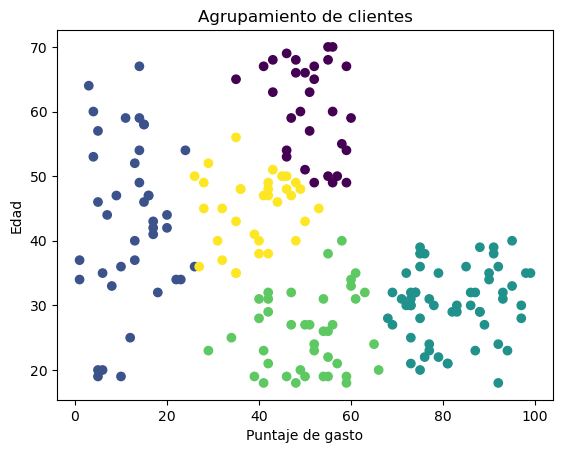

In [15]:
# Gráfica en 2D para ver la distribución de los clusters del modelo
plt.scatter(datos["PuntajeGasto"], datos["Edad"], c=datos["Cluster"], cmap="viridis")
plt.xlabel("Puntaje de gasto")
plt.ylabel("Edad")
plt.title("Agrupamiento de clientes")
plt.show()

# 7. Interpretación de los resultados

En base al modelo generado se puede concluir lo siguiente:
El coeficiente de Silhouette que corresponde a la puntuación obtenida en el modelo es de aproximadamente 0.45 puntos, esto se acerca casi a la mita de 1. Por ser menos de la mitad, nos indica que los grupos no son del todo distintos y estos se relacionan y se encuentran un poco superpuestos entre sí; como es sabido, el objetivo ideal es una puntuación más cercana a 1, pero para el caso de este modelo no se da.

Por otro lado, respecto al índice de Calinski Harabasz; este nos genera un puntaje de 302.4 lo cual nos indica que los clusters del modelo no son del todo densos y no están apropiadamente separados. Este puntaje nos señala bajas definiciones en el cluster, esto implica que la agrupación en clusters no ha conseguido generar une buena estructura de los datos.

Finalmente, respecto al Indice Davies Bouldin, obtenemos un puntaje de 0.78 el cual es muy alto para el modelo generado. Recordemos que en este índice entre más bajo sea el puntaje mucho mejor. En este caso, esta puntuación nos indica que hay una mayor similitud entre los clusters y una baja separación.